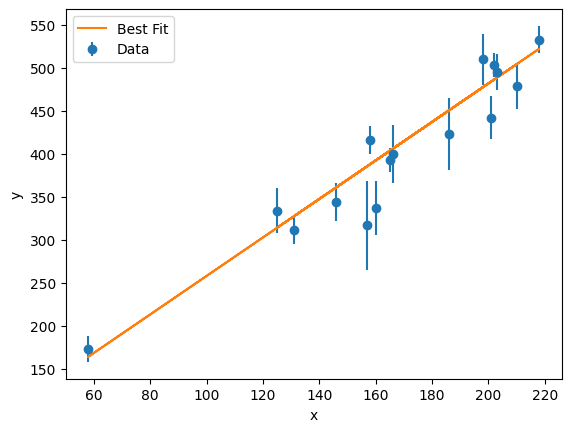

Best-fit slope (m): [2.23992083]
Standard uncertainty variance (sigma^2_m): 0.011616631123297434


In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Defines the data points
data = np.array([
    [203, 495, 21],
    [58, 173, 15],
    [210, 479, 27],
    [202, 504, 14],
    [198, 510, 30],
    [158, 416, 16],
    [165, 393, 14],
    [201, 442, 25],
    [157, 317, 52],
    [131, 311, 16],
    [166, 400, 34],
    [160, 337, 31],
    [186, 423, 42],
    [125, 334, 26],
    [218, 533, 16],
    [146, 344, 22]
])

#Gets the relevant collumns for x, y, and sigma_y
x_values = data[:, 0]
y_values = data[:, 1]
sigma_y_values = data[:, 2]

# Constructs Y, A, and C matrices
Y = y_values.reshape(-1, 1)
A = np.vstack((np.ones_like(x_values), x_values)).T
C = np.diag(sigma_y_values**2)

#Calculates the best-fit parameters with the equation from the question
X = np.linalg.inv(A.T @ np.linalg.inv(C) @ A) @ A.T @ np.linalg.inv(C) @ Y
b_fit, m_fit = X

#Calculates uncertainty variance (i do not know what this means but code doesn't work without it i think)
sigma_m_squared = np.linalg.inv(A.T @ np.linalg.inv(C) @ A)[1, 1]

#Plots everything
plt.errorbar(x_values, y_values, yerr=sigma_y_values, fmt='o', label='Data')
plt.plot(x_values, m_fit * x_values + b_fit, label='Best Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

print("Best-fit slope (m):", m_fit)
print("Standard uncertainty variance (sigma^2_m):", sigma_m_squared)
